In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
datos_booking=pd.read_csv("EDAbooking.csv",delimiter=";")
datos_booking.head()
df_booking=pd.DataFrame(datos_booking)
df_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
df_EDA_variables=pd.DataFrame(df_booking, columns=['deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'])
df_EDA_variables

,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,No Deposit,9.0,NaN,0,Transient,164.44,0,0,Canceled,24/02/2017
1,No Deposit,250.0,NaN,0,Transient,67.00,1,0,Check-Out,20/02/2017
2,Non Refund,58.0,NaN,0,Transient,100.00,0,0,Canceled,24/01/2017
3,No Deposit,NaN,NaN,0,Transient-Party,90.00,0,0,Check-Out,28/11/2016
4,No Deposit,14.0,NaN,0,Transient,174.33,0,1,Canceled,22/05/2017
...,...,...,...,...,...,...,...,...,...,...
9995,No Deposit,250.0,NaN,0,Transient,77.00,1,0,Check-Out,22/01/2017
9996,No Deposit,9.0,NaN,0,Transient,97.20,0,1,Canceled,14/12/2016
9997,No Deposit,9.0,NaN,0,Transient,68.70,0,0,Canceled,19/01/2016
9998,Non Refund,1.0,NaN,0,Transient,170.00,0,0,Canceled,09/09/2015


In [13]:
df_EDA_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deposit_type                 10000 non-null  object 
 1   agent                        8654 non-null   float64
 2   company                      559 non-null    float64
 3   days_in_waiting_list         10000 non-null  int64  
 4   customer_type                10000 non-null  object 
 5   adr                          10000 non-null  float64
 6   required_car_parking_spaces  10000 non-null  int64  
 7   total_of_special_requests    10000 non-null  int64  
 8   reservation_status           10000 non-null  object 
 9   reservation_status_date      10000 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


### deposit_type: 
Variable categórica (cualitativa) que describe si los clientes han efectuado depósitos anticipados.

In [30]:
print(df_EDA_variables.deposit_type.unique())
cuenta_No_deposit=0
cuenta_Non_refund=0
cuenta_Refundable=0
for elemento in df_EDA_variables.deposit_type:
    if (elemento == "No Deposit"):
        cuenta_No_deposit=cuenta_No_deposit + 1
    if (elemento == "Non Refund"):
        cuenta_Non_refund=cuenta_Non_refund + 1
    if (elemento == "Refundable"):
        cuenta_Refundable = cuenta_Refundable + 1

frecuencia_No_deposit= cuenta_No_deposit/100
print("El porcentaje de reservas sin depositos es: ", frecuencia_No_deposit,"%")

frecuencia_Non_refund= cuenta_Non_refund/100
print("El porcentaje de depositos sin reembolso es: ",frecuencia_Non_refund,"%")

frecuencia_Refundable=cuenta_Refundable/100
print("El porcentaje de despositos reembolsables es: ",frecuencia_Refundable,"%")

df_EDA_variables["deposit_type"].describe()

['No Deposit' 'Non Refund' 'Refundable']
El porcentaje de reservas sin depositos es:  87.97 %
El porcentaje de depositos sin reembolso es:  11.95 %
El porcentaje de despositos reembolsables es:  0.08 %


count          10000
unique             3
top       No Deposit
freq            8797
Name: deposit_type, dtype: object

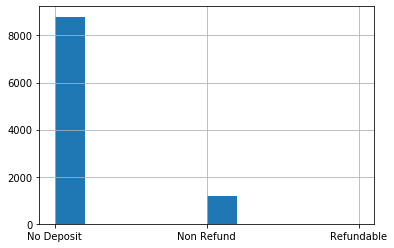

In [16]:
df_EDA_variables["deposit_type"].hist()

In [32]:
## Comparación respecto is_canceled
pd.crosstab(datos_booking['deposit_type'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
deposit_type,,
No Deposit,0.709105,0.290895
Non Refund,0.003347,0.996653
Refundable,0.875000,0.125000


### Agent
la variable AGENT (cualitativa) esun id que indica la agencia de viajes que hace la reserva.

In [29]:
id_agencias=df_EDA_variables.agent.unique()
frecuencia_id_agencias=df_EDA_variables.agent.value_counts()
porcentaje_frecuencias_id_agencias=df_EDA_variables.agent.value_counts(9.0)
print("El número de reserva hechas por cada id:",frecuencia_id_agencias)

print("El porcentaje de reservas por cada id:", porcentaje_frecuencias_id_agencias)

El número de reserva hechas por cada id: 9.0      2679
240.0    1227
1.0       620
14.0      316
7.0       304
         ... 
173.0       1
261.0       1
384.0       1
32.0        1
427.0       1
Name: agent, Length: 221, dtype: int64
El porcentaje de reservas por cada id: 9.0      0.309568
240.0    0.141784
1.0      0.071643
14.0     0.036515
7.0      0.035128
           ...   
173.0    0.000116
261.0    0.000116
384.0    0.000116
32.0     0.000116
427.0    0.000116
Name: agent, Length: 221, dtype: float64


### Company
La variable company es un identificador de la empresa o entidad que realiza la reserva.

In [19]:
id_compañias=df_EDA_variables.company.unique()

frecuencia_id_compañia=df_EDA_variables.company.value_counts()
porcentaje_frecuencias_id_compañia=df_EDA_variables.company.value_counts(40.0)
print("El número de reserva hechas por cada id:",frecuencia_id_compañia)
print("El porcentaje de reservas por cada id:", porcentaje_frecuencias_id_compañia)

El número de reserva hechas por cada id: 40.0     83
223.0    57
45.0     20
153.0    19
219.0    15
         ..
88.0      1
120.0     1
144.0     1
130.0     1
484.0     1
Name: company, Length: 143, dtype: int64
El porcentaje de reservas por cada id: 40.0     0.148479
223.0    0.101968
45.0     0.035778
153.0    0.033989
219.0    0.026834
           ...   
88.0     0.001789
120.0    0.001789
144.0    0.001789
130.0    0.001789
484.0    0.001789
Name: company, Length: 143, dtype: float64


### Days_in_waiting_list
Variable cuantitativa que recoge el número de días que pasan hasta que el usuario confirma la reserva.

In [9]:
df_EDA_variables["days_in_waiting_list"].describe()

count    10000.000000
mean         2.201200
std         17.405235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

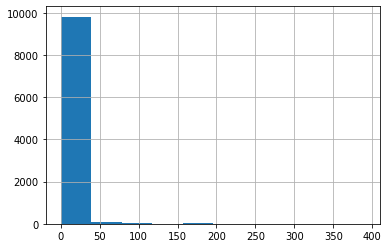

In [10]:
df_EDA_variables["days_in_waiting_list"].hist()

In [11]:
## comparación respecto a is_canceled
pd.crosstab(datos_booking['days_in_waiting_list'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
days_in_waiting_list,,
0,0.634182,0.365818
1,0.500000,0.500000
3,0.000000,1.000000
4,1.000000,0.000000
6,1.000000,0.000000
...,...,...
236,1.000000,0.000000
259,1.000000,0.000000
330,1.000000,0.000000


### Customer_type:
variable categórica que clasifica los tipos d ereservas en:contractuales, grupales, transitorias o perteneciente a una transitoria.

In [12]:
df_EDA_variables["customer_type"].describe()

count         10000
unique            4
top       Transient
freq           7530
Name: customer_type, dtype: object

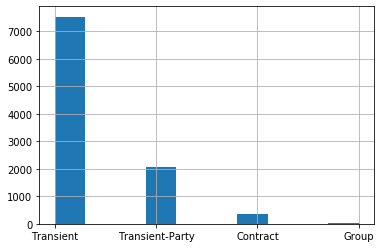

In [13]:
df_EDA_variables["customer_type"].hist()

In [14]:
## Comparación respecto is_canceled.
pd.crosstab(datos_booking['customer_type'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
customer_type,,
Contract,0.710227,0.289773
Group,0.857143,0.142857
Transient,0.585392,0.414608
Transient-Party,0.749037,0.250963


## ADR:
Variable cuantitativa que refleja el ratio entre precio pagado por la reserva o estancia, dividido entre el número de noches de estancia del usuario.

In [23]:
df_EDA_variables["adr"].describe()

count    10000.000000
mean       102.150192
std         48.778734
min          0.000000
25%         68.530000
50%         94.000000
75%        126.000000
max        388.000000
Name: adr, dtype: float64

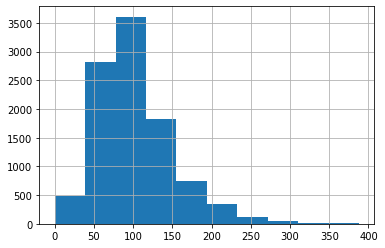

In [24]:
df_EDA_variables["adr"].hist()

In [25]:
pd.crosstab(datos_booking['adr'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
adr,,
0.0,0.901235,0.098765
0.5,0.000000,1.000000
2.0,0.000000,1.000000
4.0,0.500000,0.500000
5.2,1.000000,0.000000
...,...,...
353.0,0.000000,1.000000
359.0,1.000000,0.000000
363.0,0.000000,1.000000


### Required_car_parking_spaces: 
Número de plazas de parking solicitadas por el usuario.

In [15]:
df_EDA_variables["required_car_parking_spaces"].describe()

count    10000.00000
mean         0.06440
std          0.24629
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          2.00000
Name: required_car_parking_spaces, dtype: float64

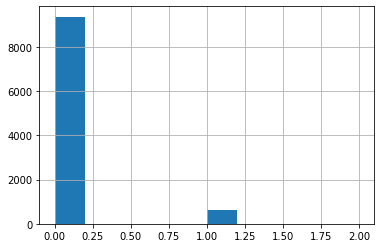

In [16]:
df_EDA_variables["required_car_parking_spaces"].hist()

In [17]:
## Comparación respecto is_canceled.
pd.crosstab(datos_booking['required_car_parking_spaces'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
required_car_parking_spaces,,
0,0.599166,0.400834
1,1.000000,0.000000
2,1.000000,0.000000


### Total_of_special_requests: 
número total de requisitos especiales solicitados por el usuario.

In [18]:
df_EDA_variables["total_of_special_requests"].describe()

count    10000.000000
mean         0.579300
std          0.797731
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

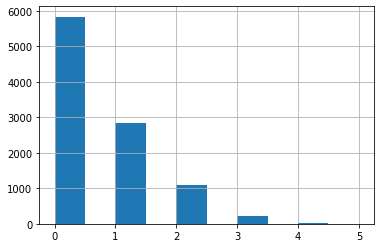

In [19]:
df_EDA_variables["total_of_special_requests"].hist()

In [ ]:
## Comparación respecto is_canceled
pd.crosstab(datos_booking['total_of_special_requests'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

### reservation_status: 
Último estado de la reserva, variable categórica que clasifica en: cancelado, check-out (finalizada estancia), sin aparecer (el usuario no ha realizado el check in, informando al hotel la razón)


In [21]:
df_EDA_variables["reservation_status"].describe()

count         10000
unique            3
top       Check-Out
freq           6249
Name: reservation_status, dtype: object

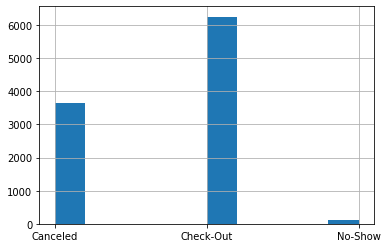

In [22]:
df_EDA_variables["reservation_status"].hist()

In [23]:
## Comparación respecto is_canceled
pd.crosstab(datos_booking['reservation_status'], datos_booking['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
reservation_status,,
Canceled,0.0,1.0
Check-Out,1.0,0.0
No-Show,0.0,1.0


### reservation_status_date
Fecha de la última actualización del estado de la reserva

In [4]:
df_EDA_variables["reservation_status_date"].describe()

count          10000
unique           849
top       21/10/2015
freq             137
Name: reservation_status_date, dtype: object

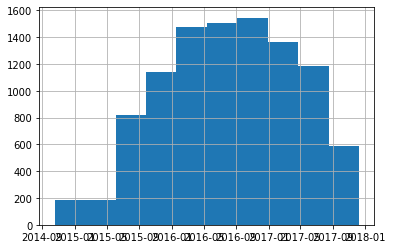

In [37]:
fechas=pd.to_datetime(df_EDA_variables["reservation_status_date"])
fechas.hist()